# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
import plotly.express as px
from woodwork.logical_types import Categorical, Double, Integer
# import xgboost as xgb  # Імпортуємо XGBoost
from sklearn.ensemble import GradientBoostingClassifier  # Замінюємо XGBoost на GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier  # Додаємо RidgeClassifier із L2-регуляризацією


In [2]:
abalone = pd.read_csv('data/abalone.data', delimiter=',')
abalone.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/abalone.data'

In [363]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [364]:
# Перейменовуємо колонки
abalone.columns = ['sex', 'Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']

# Додаємо унікальний індекс
abalone['id'] = range(len(abalone))

In [365]:
# Кодування 'sex' у числовий формат для кореляції
le = LabelEncoder()
abalone['sex_encoded'] = le.fit_transform(abalone['sex']) + 1
abalone.head()

,sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,id,sex_encoded
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,3
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,1
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2,3
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,3,2
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,4,2


Візуалізація перед генерацією фіч

In [30]:
# Візуалізація для Rings
numeric_features = ['Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'sex_encoded']
X_tsne = abalone[numeric_features].values

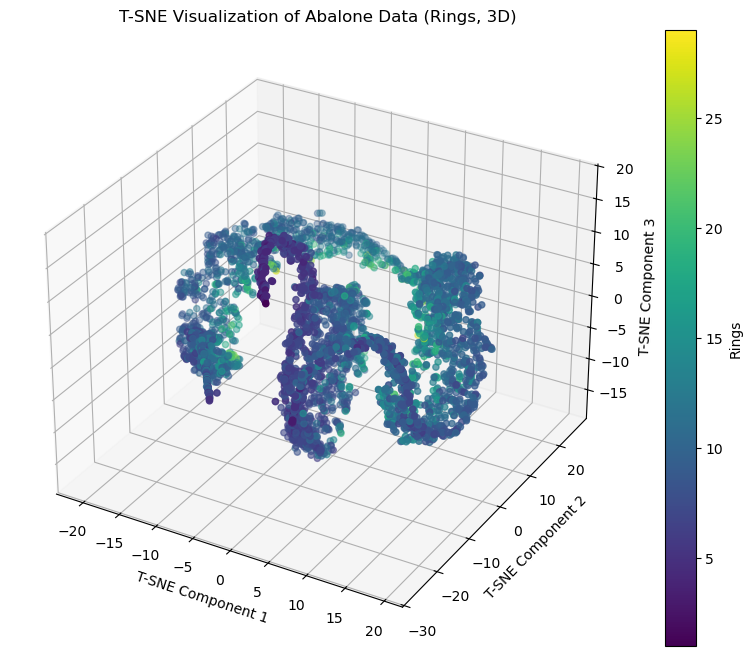

In [31]:

# 1. T-SNE для Rings (3D)
tsne = TSNE(n_components=3, random_state=42)
X_tsne_embedded = tsne.fit_transform(X_tsne)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_embedded[:, 0], X_tsne_embedded[:, 1], X_tsne_embedded[:, 2], c=abalone['Rings'], cmap='viridis')
plt.colorbar(scatter, label='Rings')
ax.set_title("T-SNE Visualization of Abalone Data (Rings, 3D)")
ax.set_xlabel("T-SNE Component 1")
ax.set_ylabel("T-SNE Component 2")
ax.set_zlabel("T-SNE Component 3")
plt.show()

In [32]:
# 1. Інтерактивний T-SNE для Rings (3D)
fig = px.scatter_3d(
    x=X_tsne_embedded[:, 0],
    y=X_tsne_embedded[:, 1],
    z=X_tsne_embedded[:, 2],
    color=abalone['Rings'],
    title="Interactive T-SNE Visualization of Abalone Data (Rings, 3D)",
    labels={'x': 'T-SNE Component 1', 'y': 'T-SNE Component 2', 'z': 'T-SNE Component 3'},
    # color_continuous_scale='Viridis'
)
fig.update_layout(width=800, height=600)
fig.show()

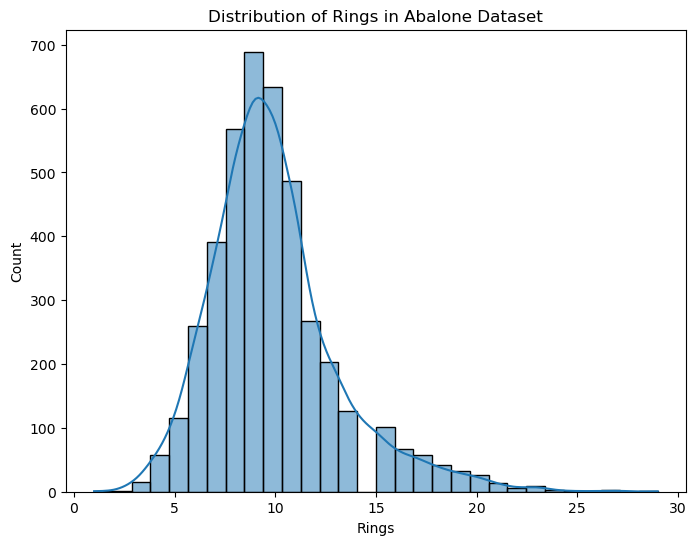

In [33]:
# 2. Розподіл Rings
plt.figure(figsize=(8, 6))
sns.histplot(abalone['Rings'], bins=30, kde=True)
plt.title("Distribution of Rings in Abalone Dataset")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.show()

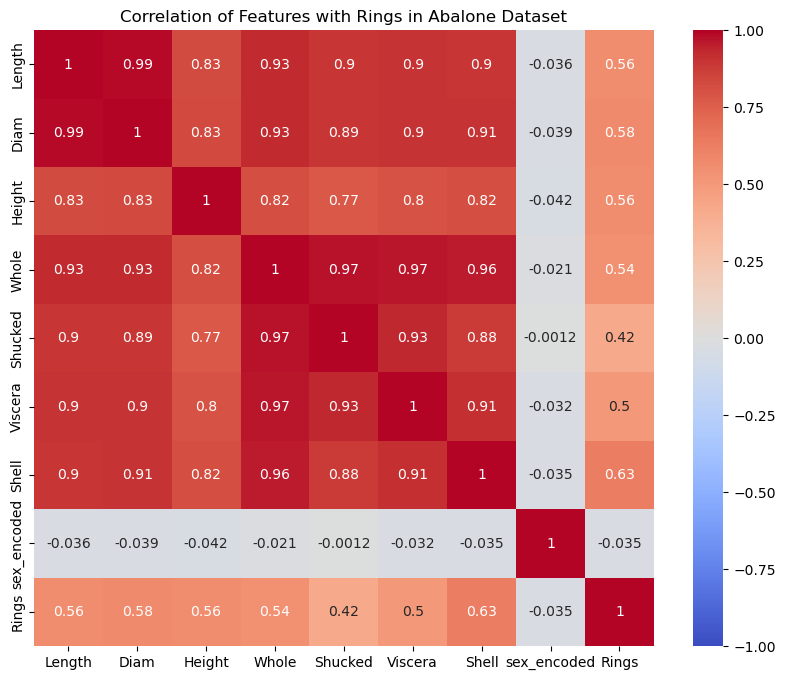

In [34]:
# 3. Кореляція фіч до Rings
plt.figure(figsize=(10, 8))
correlation_matrix = abalone[numeric_features + ['Rings']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Rings in Abalone Dataset")
plt.show()

Візуалізація для Sex

In [ ]:
numeric_features_1 = ['Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
X_tsne_1 = abalone[numeric_features_1].values
tsne = TSNE(n_components=3, random_state=42)
X_tsne_embedded_1 = tsne.fit_transform(X_tsne_1)


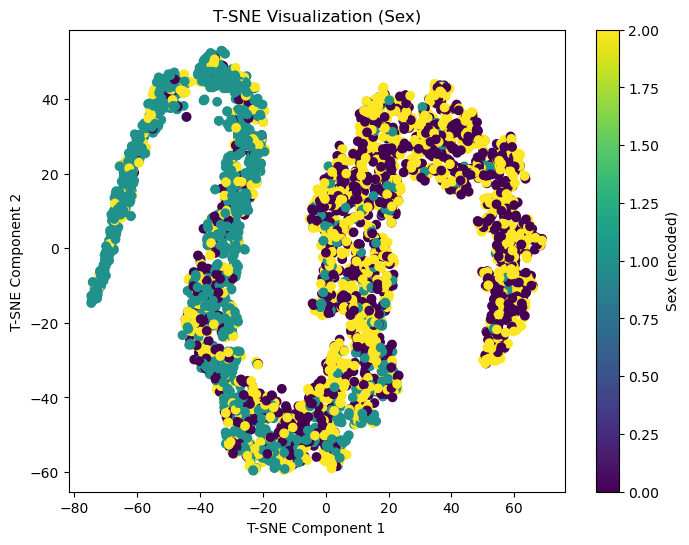

In [13]:
# 1. T-SNE для Sex
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_embedded_1[:, 0], X_tsne_embedded_1[:, 1], c=abalone['sex_encoded'], cmap='viridis')
plt.colorbar(label='Sex (encoded)')
plt.title("T-SNE Visualization (Sex)")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.show()

In [29]:
# 1. Інтерактивний T-SNE для Sex (3D)


fig = px.scatter_3d(
    x=X_tsne_embedded_1[:, 0],
    y=X_tsne_embedded_1[:, 1],
    z=X_tsne_embedded_1[:, 2],
    color=abalone['sex_encoded'],
    title="Interactive T-SNE Visualization of Abalone Data (Sex, 3D)",
    labels={'x': 'T-SNE Component 1', 'y': 'T-SNE Component 2', 'z': 'T-SNE Component 3'},
    # color_continuous_scale='Viridis'
)
fig.update_layout(width=800, height=600)
fig.show()

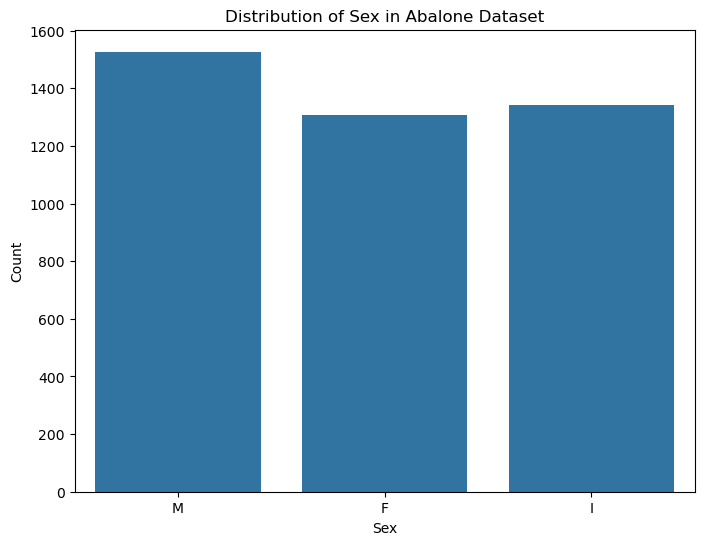

In [35]:
# 2. Розподіл Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=abalone)
plt.title("Distribution of Sex in Abalone Dataset")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

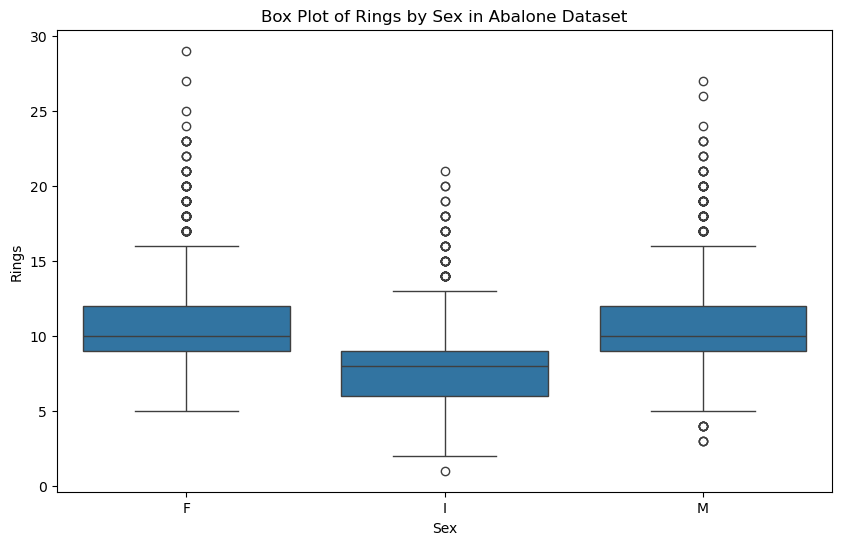

In [216]:
# 4. Бокс-плот для sex і Rings
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='Rings', data=abalone)
plt.title("Box Plot of Rings by Sex in Abalone Dataset")
plt.xlabel("Sex")
plt.ylabel("Rings")
plt.show()

In [366]:
# Генеруємо фічі через Featuretools
es = ft.EntitySet(id="abalone_dataset")
es = es.add_dataframe(
    dataframe_name="abalone",
    dataframe=abalone,
    index="id",
    logical_types={
        'sex': Categorical,
        'Length': Double,
        'Diam': Double,
        'Height': Double,
        'Whole': Double,
        'Shucked': Double,
        'Viscera': Double,
        'Shell': Double,
        'Rings': Integer,
        'sex_encoded': Integer,
        'id': Integer
    }
)
es

Entityset: abalone_dataset
  DataFrames:
    abalone [Rows: 4176, Columns: 11]
  Relationships:
    No relationships

In [379]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="abalone",
    trans_primitives=[
        "divide_numeric",
        "add_numeric",
        "multiply_numeric",
        "subtract_numeric",
        "absolute",
        "percentile"
    ],
    max_depth=1,
    ignore_columns={"abalone": ["Rings"]}  
)

In [380]:
feature_matrix.head()

,sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,sex_encoded,ABSOLUTE(Diam),...,Shell - Shucked,Shell - Viscera,Shell - Whole,Shucked - Viscera,Shucked - Whole,Viscera - Whole,sex_encoded - Shell,sex_encoded - Shucked,sex_encoded - Viscera,sex_encoded - Whole
id,,,,,,,,,,,,,,,,,,,,,
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,3,0.265,...,-0.0295,0.0215,-0.1555,0.0510,-0.1260,-0.1770,2.930,2.9005,2.9515,2.7745
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0.420,...,-0.0465,0.0685,-0.4670,0.1150,-0.4205,-0.5355,0.790,0.7435,0.8585,0.3230
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,3,0.365,...,-0.0605,0.0410,-0.3610,0.1015,-0.3005,-0.4020,2.845,2.7845,2.8860,2.4840
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,2,0.255,...,-0.0345,0.0155,-0.1500,0.0500,-0.1155,-0.1655,1.945,1.9105,1.9605,1.7950
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,2,0.300,...,-0.0210,0.0425,-0.2315,0.0635,-0.2105,-0.2740,1.880,1.8590,1.9225,1.6485


In [381]:
feature_defs

[<Feature: sex>,
 <Feature: Length>,
 <Feature: Diam>,
 <Feature: Height>,
 <Feature: Whole>,
 <Feature: Shucked>,
 <Feature: Viscera>,
 <Feature: Shell>,
 <Feature: sex_encoded>,
 <Feature: ABSOLUTE(Diam)>,
 <Feature: ABSOLUTE(Height)>,
 <Feature: ABSOLUTE(Length)>,
 <Feature: ABSOLUTE(Shell)>,
 <Feature: ABSOLUTE(Shucked)>,
 <Feature: ABSOLUTE(Viscera)>,
 <Feature: ABSOLUTE(Whole)>,
 <Feature: ABSOLUTE(sex_encoded)>,
 <Feature: Diam + Height>,
 <Feature: Diam + Length>,
 <Feature: Diam + Shell>,
 <Feature: Diam + Shucked>,
 <Feature: Diam + Viscera>,
 <Feature: Diam + Whole>,
 <Feature: Diam + sex_encoded>,
 <Feature: Height + Length>,
 <Feature: Height + Shell>,
 <Feature: Height + Shucked>,
 <Feature: Height + Viscera>,
 <Feature: Height + Whole>,
 <Feature: Height + sex_encoded>,
 <Feature: Length + Shell>,
 <Feature: Length + Shucked>,
 <Feature: Length + Viscera>,
 <Feature: Length + Whole>,
 <Feature: Length + sex_encoded>,
 <Feature: Shell + Shucked>,
 <Feature: Shell + Viscer

In [382]:
# Очищаємо від inf і NaN
feature_matrix_cleaned = feature_matrix.replace([np.inf, -np.inf], np.nan)
feature_matrix_cleaned = feature_matrix_cleaned.dropna(axis=1, how='any')
feature_matrix_no_sex = feature_matrix_cleaned.drop(columns=['sex'] if 'sex' in feature_matrix_cleaned.columns else [])
feature_matrix_no_sex['Rings'] = abalone['Rings']

feature_matrix_no_sex


,Length,Diam,Height,Whole,Shucked,Viscera,Shell,sex_encoded,ABSOLUTE(Diam),ABSOLUTE(Height),...,Shell - Viscera,Shell - Whole,Shucked - Viscera,Shucked - Whole,Viscera - Whole,sex_encoded - Shell,sex_encoded - Shucked,sex_encoded - Viscera,sex_encoded - Whole,Rings
id,,,,,,,,,,,,,,,,,,,,,
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,3,0.265,0.090,...,0.0215,-0.1555,0.0510,-0.1260,-0.1770,2.9300,2.9005,2.9515,2.7745,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0.420,0.135,...,0.0685,-0.4670,0.1150,-0.4205,-0.5355,0.7900,0.7435,0.8585,0.3230,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,3,0.365,0.125,...,0.0410,-0.3610,0.1015,-0.3005,-0.4020,2.8450,2.7845,2.8860,2.4840,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2,0.255,0.080,...,0.0155,-0.1500,0.0500,-0.1155,-0.1655,1.9450,1.9105,1.9605,1.7950,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2,0.300,0.095,...,0.0425,-0.2315,0.0635,-0.2105,-0.2740,1.8800,1.8590,1.9225,1.6485,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0.450,0.165,...,0.0100,-0.6380,0.1310,-0.5170,-0.6480,0.7510,0.6300,0.7610,0.1130,11
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,3,0.440,0.135,...,0.0460,-0.7055,0.2245,-0.5270,-0.7515,2.7395,2.5610,2.7855,2.0340,10
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,3,0.475,0.205,...,0.0205,-0.8680,0.2380,-0.6505,-0.8885,2.6920,2.4745,2.7125,1.8240,9


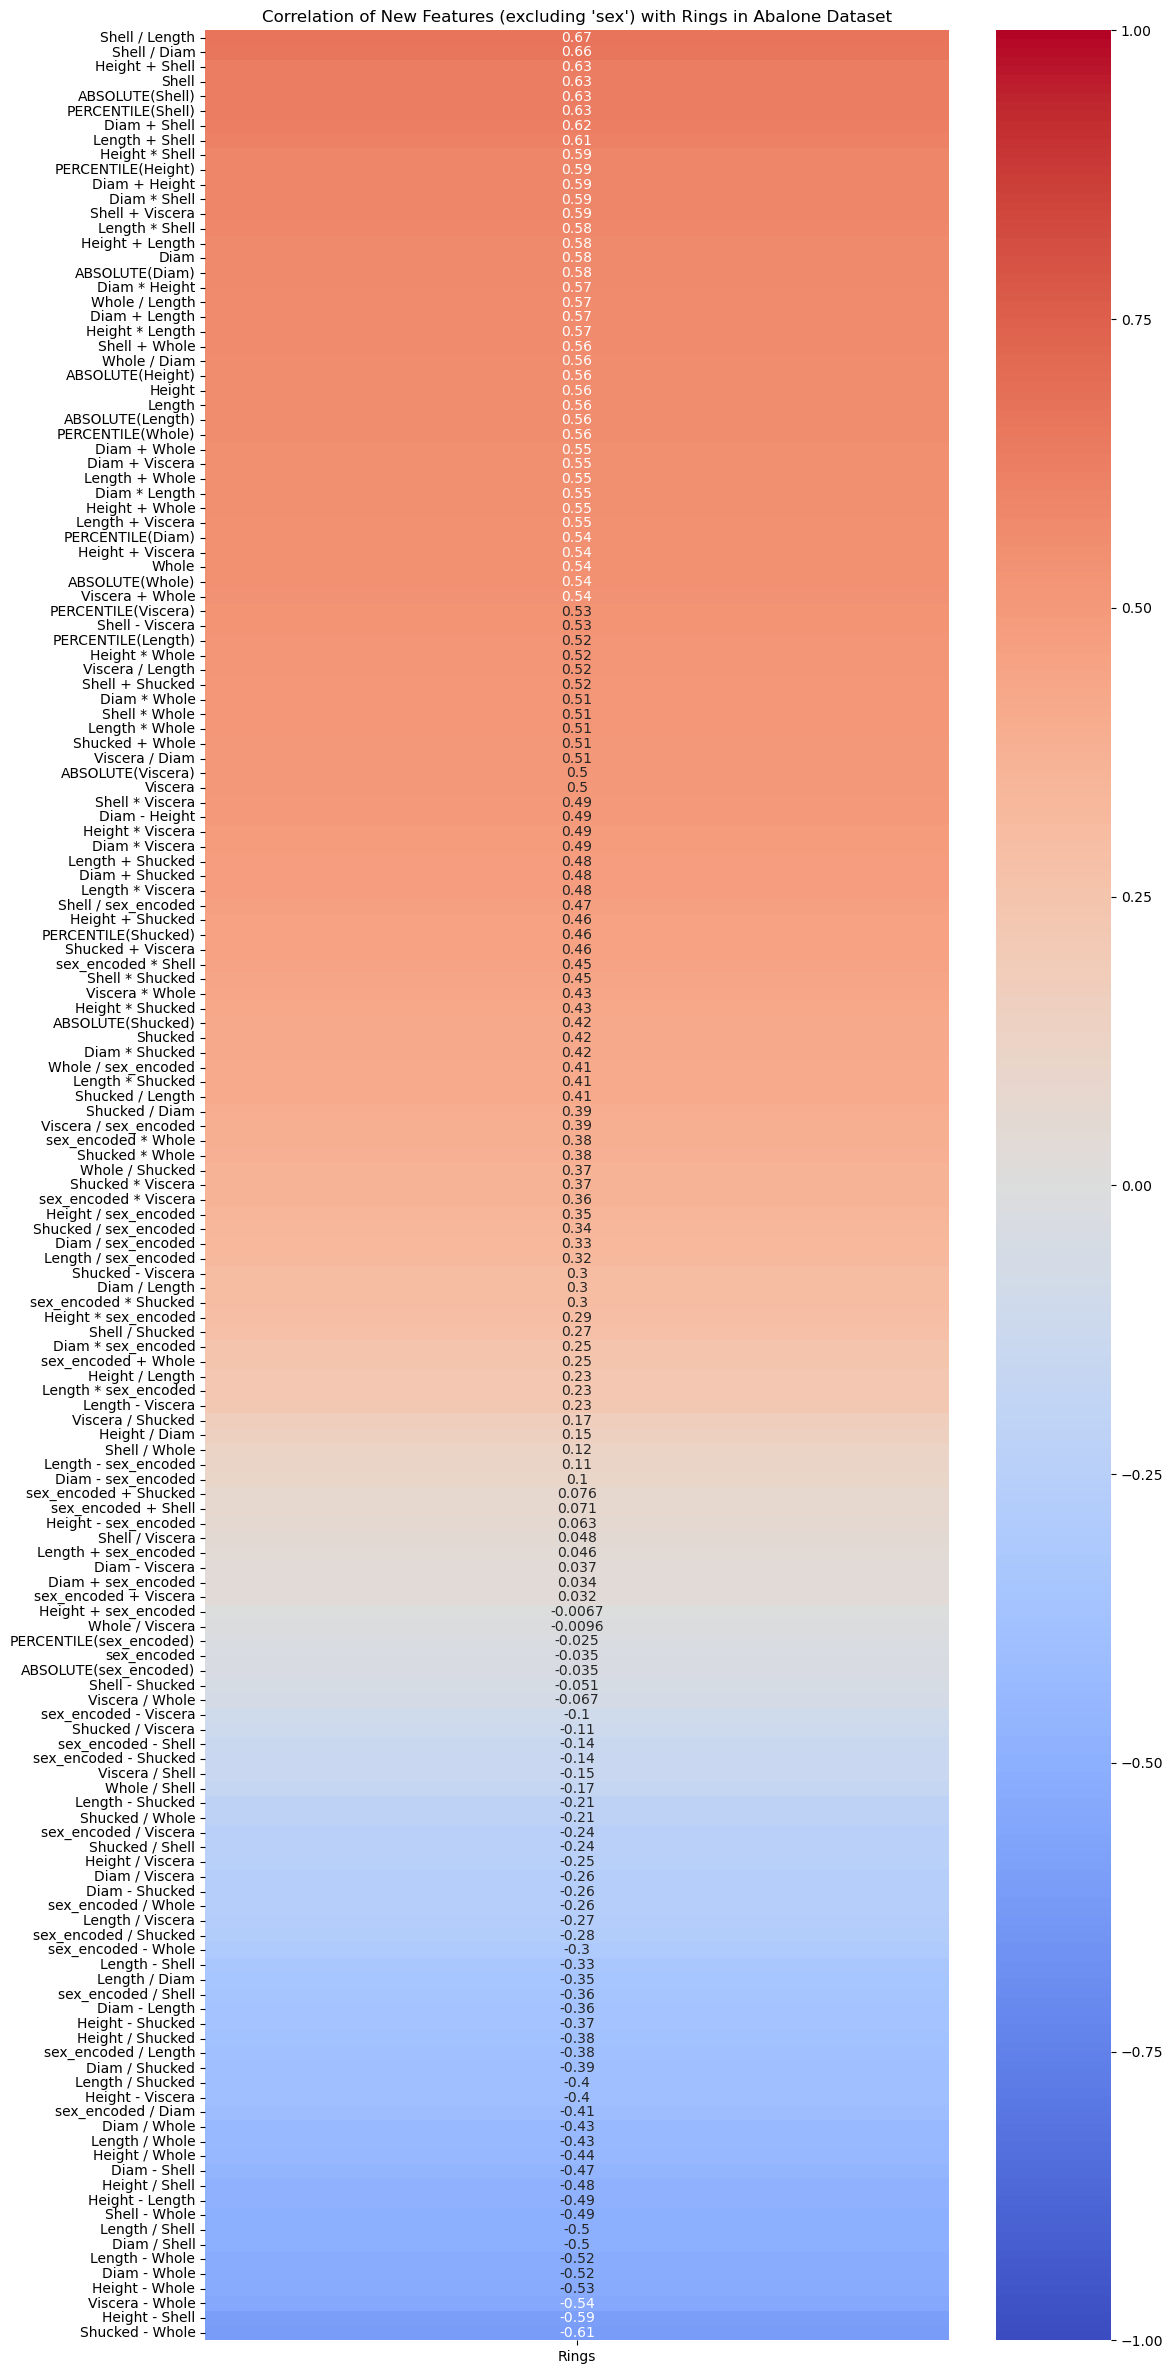

In [383]:
# Обчислюємо кореляцію
plt.figure(figsize=(12, 30))

correlation_new_features = feature_matrix_no_sex.corr()['Rings'].drop('Rings')  # Видаляємо кореляцію Rings із собою
correlation_new_features_sort = correlation_new_features.sort_values(ascending=False)
sns.heatmap(
    correlation_new_features_sort.to_frame(),  # Залишаємо як вертикальний DataFrame
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    xticklabels=['Rings'],
    yticklabels=correlation_new_features_sort.index  # Назви фіч по осі Y
)
plt.title("Correlation of New Features (excluding 'sex') with Rings in Abalone Dataset")
plt.show()


In [110]:
# Фільтруємо фічі з кореляцією > 0.5 або < -0.5
filtered_features = correlation_new_features[abs(correlation_new_features) > 0.5]
print(f"\nКількість фіч із кореляцією > 0.5 або < -0.5: {len(filtered_features)}")



Кількість фіч із кореляцією > 0.5 або < -0.5: 60


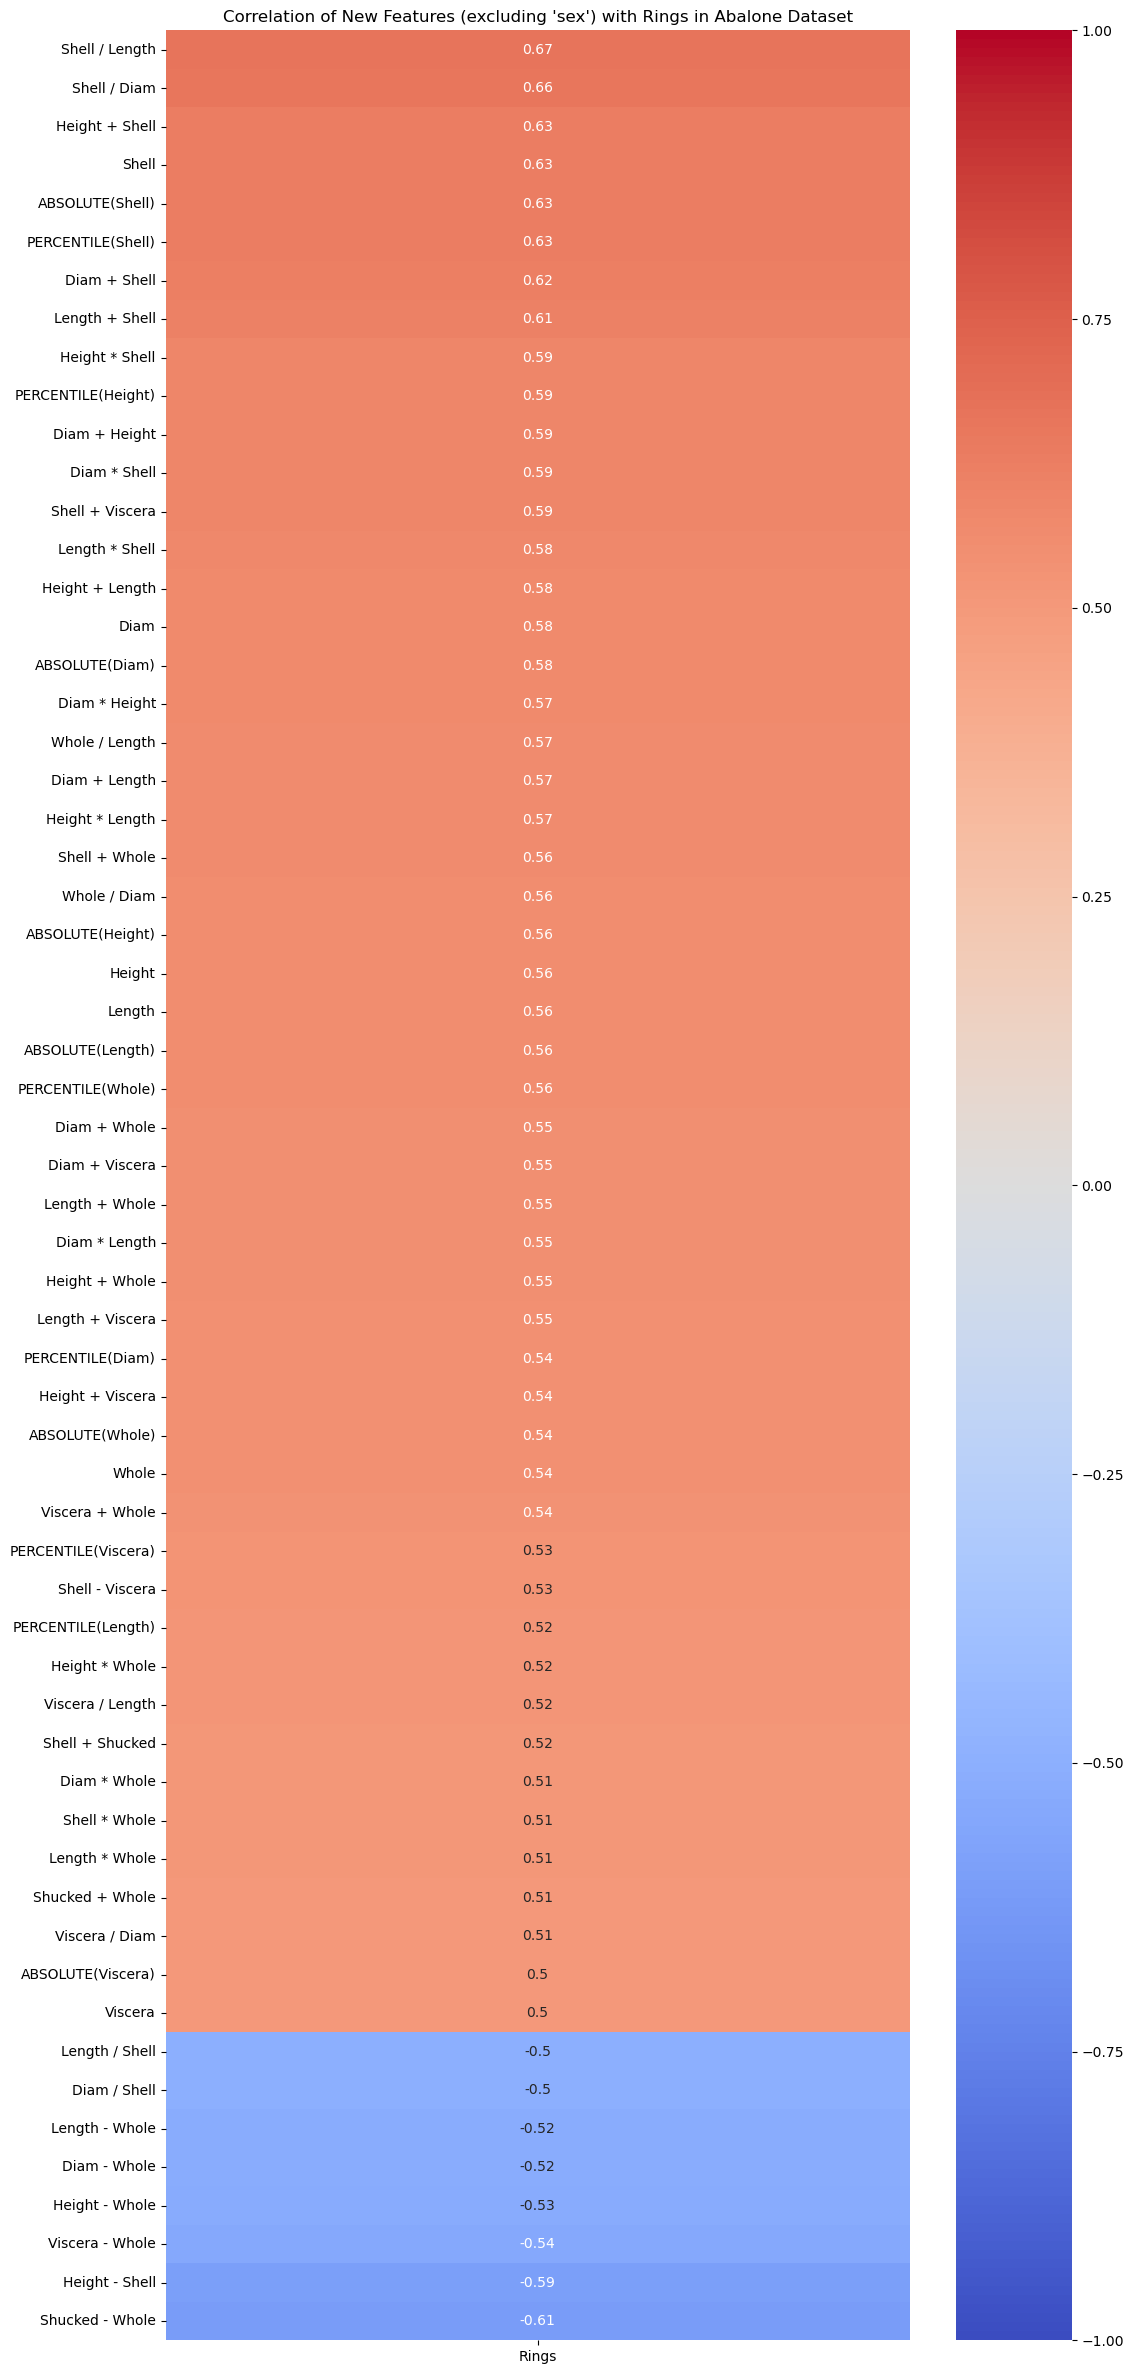

In [111]:
# Обчислюємо кореляцію
plt.figure(figsize=(12, 30))

filtered_features_sort = filtered_features.sort_values(ascending=False)
sns.heatmap(
    filtered_features_sort.to_frame(),  # Залишаємо як вертикальний DataFrame
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    xticklabels=['Rings'],
    yticklabels=filtered_features_sort.index  # Назви фіч по осі Y
)
plt.title("Correlation of New Features (excluding 'sex') with Rings in Abalone Dataset")
plt.show()

In [119]:
# Створюємо новий DataFrame із відфільтрованими фічами і додаємо Rings
filtered_features_df = feature_matrix_no_sex[filtered_features.index]
filtered_features_df['Rings'] = abalone['Rings']

print(f"\nКількість фіч із кореляцією > 0.5 або < -0.5: {len(filtered_features)}")
filtered_features_df.head()


Кількість фіч із кореляцією > 0.5 або < -0.5: 61


,Length,Diam,Height,Whole,Viscera,Shell,ABSOLUTE(Diam),ABSOLUTE(Height),ABSOLUTE(Length),ABSOLUTE(Shell),...,PERCENTILE(Viscera),PERCENTILE(Whole),Diam - Whole,Height - Shell,Height - Whole,Length - Whole,Shell - Viscera,Shucked - Whole,Viscera - Whole,Rings
id,,,,,,,,,,,,,,,,,,,,,
0,0.350,0.265,0.090,0.2255,0.0485,0.070,0.265,0.090,0.350,0.070,...,0.114703,0.116739,0.0395,0.020,-0.1355,0.1245,0.0215,-0.1260,-0.1770,7
1,0.530,0.420,0.135,0.6770,0.1415,0.210,0.420,0.135,0.530,0.210,...,0.403736,0.421336,-0.2570,-0.075,-0.5420,-0.1470,0.0685,-0.4205,-0.5355,9
2,0.440,0.365,0.125,0.5160,0.1140,0.155,0.365,0.125,0.440,0.155,...,0.316571,0.306513,-0.1510,-0.030,-0.3910,-0.0760,0.0410,-0.3005,-0.4020,10
3,0.330,0.255,0.080,0.2050,0.0395,0.055,0.255,0.080,0.330,0.055,...,0.087763,0.100096,0.0500,0.025,-0.1250,0.1250,0.0155,-0.1155,-0.1655,7
4,0.425,0.300,0.095,0.3515,0.0775,0.120,0.300,0.095,0.425,0.120,...,0.202706,0.190613,-0.0515,-0.025,-0.2565,0.0735,0.0425,-0.2105,-0.2740,8


In [431]:
# Об’єднуємо класи: до 7 — клас 0, більше 13 — клас 99
abalone['Rings_modified'] = abalone['Rings'].apply(lambda x: 1 if x < 7 else (99 if x > 11 else x))
feature_matrix_no_sex['Rings_modified'] = abalone['Rings_modified']

print("\nКількість унікальних класів після об’єднання:", len(feature_matrix_no_sex['Rings_modified'].unique()))
print("Нові класи:", sorted(feature_matrix_no_sex['Rings_modified'].unique()))




Кількість унікальних класів після об’єднання: 7
Нові класи: [np.int64(1), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(99)]


In [432]:
# Розділяємо дані з відфільтрованих фіч
X = feature_matrix_no_sex.drop(columns=["Rings", "Rings_modified"]).values
y = feature_matrix_no_sex["Rings_modified"].values

In [433]:
# Розділяємо на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [434]:
# Масштабування фіч
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [435]:
# Тренуємо KNN
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=15)

In [436]:
y_pred = model.predict(X_test_scaled)


In [437]:
# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочність моделі (Accuracy): {accuracy}")
print("\nЗвіт про класифікацію:")
print(classification_report(y_test, y_pred))


Точність моделі (Accuracy): 0.4022346368715084

Звіт про класифікацію:
              precision    recall  f1-score   support

           1       0.69      0.73      0.71       149
           7       0.27      0.29      0.28       110
           8       0.32      0.33      0.33       177
           9       0.28      0.35      0.31       200
          10       0.26      0.19      0.22       191
          11       0.29      0.17      0.22       151
          99       0.56      0.62      0.59       275

    accuracy                           0.40      1253
   macro avg       0.38      0.38      0.38      1253
weighted avg       0.39      0.40      0.39      1253



In [438]:
# --- Модель 3: RidgeClassifier для sex_encoded із L2-регуляризацією ---
model_ring_ridge = RidgeClassifier(
    alpha=10.0,  # Сила L2-регуляризації
    random_state=42
)
model_ring_ridge.fit(X_train_scaled, y_train)

y_pred_ring_ridge = model_ring_ridge.predict(X_test_scaled)

In [439]:
accuracy_ring_ridge = accuracy_score(y_test, y_pred_ring_ridge)
print(f"\nТочність моделі для ring (RidgeClassifier, Accuracy): {accuracy_ring_ridge}")
print("\nЗвіт про класифікацію для ring (RidgeClassifier):")
print(classification_report(y_test, y_pred_ring_ridge, zero_division=1))


Точність моделі для ring (RidgeClassifier, Accuracy): 0.44772545889864324

Звіт про класифікацію для ring (RidgeClassifier):
              precision    recall  f1-score   support

           1       0.65      0.80      0.71       149
           7       0.37      0.26      0.31       110
           8       0.37      0.37      0.37       177
           9       0.32      0.37      0.34       200
          10       0.41      0.15      0.22       191
          11       0.33      0.07      0.12       151
          99       0.49      0.85      0.62       275

    accuracy                           0.45      1253
   macro avg       0.42      0.41      0.38      1253
weighted avg       0.42      0.45      0.40      1253



In [440]:
model = GradientBoostingClassifier(
    n_estimators=50,  # Зменшуємо кількість дерев
    # max_depth=2,      # Зменшуємо глибину дерев
    random_state=42
)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [441]:
# Передбачення на тестовій вибірці
y_pred = model.predict(X_test_scaled)

In [397]:
# Оцінка моделі з обробкою невизначеної точності
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочність моделі (Accuracy): {accuracy}")
print("\nЗвіт про класифікацію:")
print(classification_report(y_test, y_pred))  


Точність моделі (Accuracy): 0.37270550678371905

Звіт про класифікацію:
              precision    recall  f1-score   support

           1       0.66      0.66      0.66       149
           7       0.27      0.31      0.29       110
           8       0.28      0.28      0.28       177
           9       0.29      0.34      0.32       200
          10       0.26      0.28      0.27       191
          11       0.27      0.19      0.22       151
          12       0.16      0.04      0.06        74
          99       0.55      0.66      0.60       201

    accuracy                           0.37      1253
   macro avg       0.34      0.34      0.34      1253
weighted avg       0.36      0.37      0.36      1253



In [367]:
feature_matr_1, feature_defs_1 = ft.dfs(
    entityset=es,
    target_dataframe_name="abalone",
    trans_primitives=[
        "divide_numeric",
        "add_numeric",
        "multiply_numeric",
        "subtract_numeric",
        "absolute",
        "percentile"
    ],
    max_depth=1,
    ignore_columns={"abalone": ["sex_encoded"]}  
)

In [368]:
feature_matr_1 = feature_matr_1.drop(columns=[ 'sex'])

In [369]:
feature_matr_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4176 entries, 0 to 4175
Columns: 164 entries, Length to Viscera - Whole
dtypes: float64(163), int64(1)
memory usage: 5.3 MB


In [370]:
feature_matr_1.head()

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,ABSOLUTE(Diam),ABSOLUTE(Height),...,Rings - Shell,Rings - Shucked,Rings - Viscera,Rings - Whole,Shell - Shucked,Shell - Viscera,Shell - Whole,Shucked - Viscera,Shucked - Whole,Viscera - Whole
id,,,,,,,,,,,,,,,,,,,,,
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.265,0.090,...,6.930,6.9005,6.9515,6.7745,-0.0295,0.0215,-0.1555,0.0510,-0.1260,-0.1770
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.420,0.135,...,8.790,8.7435,8.8585,8.3230,-0.0465,0.0685,-0.4670,0.1150,-0.4205,-0.5355
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.365,0.125,...,9.845,9.7845,9.8860,9.4840,-0.0605,0.0410,-0.3610,0.1015,-0.3005,-0.4020
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.255,0.080,...,6.945,6.9105,6.9605,6.7950,-0.0345,0.0155,-0.1500,0.0500,-0.1155,-0.1655
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0.300,0.095,...,7.880,7.8590,7.9225,7.6485,-0.0210,0.0425,-0.2315,0.0635,-0.2105,-0.2740


In [371]:
feature_matr_1['sex_encoded'] = abalone['sex_encoded']

In [372]:
feature_matrix_1_cleaned = feature_matr_1.replace([np.inf, -np.inf], np.nan)
feature_matrix_1_cleaned = feature_matrix_1_cleaned.dropna(axis=1, how='any')


In [373]:

# --- Модель 2: GradientBoostingClassifier для sex_encoded ---
X_sex = feature_matrix_1_cleaned.drop(columns=[ 'sex_encoded']).values  # Виключаємо sex і sex_encoded
y_sex = feature_matrix_1_cleaned['sex_encoded'].values  # Таргет — sex_encoded


In [374]:
abalone.head()

,sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,id,sex_encoded
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,3
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,1
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2,3
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,3,2
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,4,2


In [375]:
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(X_sex, y_sex, test_size=0.3, random_state=42)

In [376]:
scaler_sex = StandardScaler()
X_train_scaled_sex = scaler_sex.fit_transform(X_train_sex)
X_test_scaled_sex = scaler_sex.transform(X_test_sex)


In [377]:
model_sex = GradientBoostingClassifier(
    n_estimators=100,
    # max_depth=2,
    random_state=42
)
model_sex.fit(X_train_scaled_sex, y_train_sex)

y_pred_sex = model_sex.predict(X_test_scaled_sex)

In [378]:
accuracy_sex = accuracy_score(y_test_sex, y_pred_sex)
print(f"\nТочність моделі для sex_encoded (Accuracy): {accuracy_sex}")
print("\nЗвіт про класифікацію для sex_encoded:")
print(classification_report(y_test_sex, y_pred_sex))


Точність моделі для sex_encoded (Accuracy): 0.5722266560255387

Звіт про класифікацію для sex_encoded:
              precision    recall  f1-score   support

           1       0.49      0.39      0.44       390
           2       0.72      0.82      0.77       398
           3       0.49      0.51      0.50       465

    accuracy                           0.57      1253
   macro avg       0.57      0.57      0.57      1253
weighted avg       0.56      0.57      0.56      1253



In [415]:
# --- Модель 3: RidgeClassifier для sex_encoded із L2-регуляризацією ---
model_sex_ridge = RidgeClassifier(
    alpha=1.0,  # Сила L2-регуляризації
    random_state=42
)
model_sex_ridge.fit(X_train_scaled_sex, y_train_sex)

y_pred_sex_ridge = model_sex_ridge.predict(X_test_scaled_sex)

In [417]:
accuracy_sex_ridge = accuracy_score(y_test_sex, y_pred_sex_ridge)
report_sex_ridge = classification_report(y_test_sex, y_pred_sex_ridge, zero_division=1, output_dict=True)
f1_sex_ridge = report_sex_ridge['weighted avg']['f1-score']
print(f"\nТочність моделі для sex_encoded (RidgeClassifier, Accuracy): {accuracy_sex_ridge}")
print("\nЗвіт про класифікацію для sex_encoded (RidgeClassifier):")
print(classification_report(y_test_sex, y_pred_sex_ridge, zero_division=1))


Точність моделі для sex_encoded (RidgeClassifier, Accuracy): 0.5674381484437351

Звіт про класифікацію для sex_encoded (RidgeClassifier):
              precision    recall  f1-score   support

           1       0.50      0.37      0.43       390
           2       0.68      0.81      0.74       398
           3       0.50      0.52      0.51       465

    accuracy                           0.57      1253
   macro avg       0.56      0.57      0.56      1253
weighted avg       0.56      0.57      0.56      1253



In [421]:
accuracy_sex_ridge = accuracy_score(y_test_sex, y_pred_sex_ridge)
report_sex_ridge = classification_report(y_test_sex, y_pred_sex_ridge, zero_division=1)
print(f"\nТочність моделі для sex_encoded (RidgeClassifier, Accuracy): {accuracy_sex_ridge}")
print("\nЗвіт про класифікацію для sex_encoded (RidgeClassifier):")
print(report_sex_ridge)


Точність моделі для sex_encoded (RidgeClassifier, Accuracy): 0.5674381484437351

Звіт про класифікацію для sex_encoded (RidgeClassifier):
              precision    recall  f1-score   support

           1       0.50      0.37      0.43       390
           2       0.68      0.81      0.74       398
           3       0.50      0.52      0.51       465

    accuracy                           0.57      1253
   macro avg       0.56      0.57      0.56      1253
weighted avg       0.56      0.57      0.56      1253



In [422]:
# Візуалізація коефіцієнтів для RidgeClassifier
# Оскільки це багатокласова класифікація, беремо середнє абсолютне значення коефіцієнтів по класах
ridge_coefficients = pd.DataFrame({
    'Feature': X_sex.columns,
    'Coefficient': np.mean(np.abs(model_sex_ridge.coef_), axis=0)  # Середнє абсолютне значення по класах
}).sort_values(by='Coefficient', ascending=False)

 
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=ridge_coefficients.head(10), palette='Reds_d')
plt.title("Top 10 Coefficients for sex_encoded (RidgeClassifier)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'